# Linearized Weight Representation in Neural Networks

In this documentation, we'll explore a unique approach to representing weights in neural networks, followed by a detailed explanation of the equations involved in the backpropagation algorithm using this representation.

## Introduction

### Linearized Weight Representation

Traditionally, the weights in neural networks are represented as matrices for each layer. However, in this approach, we linearize the weights into a flat array. The linearization simplifies mathematical formulations and aligns with the conventions of optimization algorithms used in deep learning frameworks.

I attempted a different approach by using a flat weight array $w$ and a flat bias array $b$. The weights are accessed as matrices during computations, providing a balance between computational efficiency and simplicity in formulation.

## Equations

Let's delve into the equations that govern the backpropagation algorithm with this linearized weight representation.

### Weight and Bias Lengths

$$w\_len = l_1.l_2 + l_2.l_3 + ... + l_{n-1}.l_n$$

$$b\_len = l_2 + l_3 + ... + l_n$$

These equations define the lengths of the weight and bias arrays based on the layer sizes $l_1, l_2, ..., l_n$.

### Forward Pass

The forward pass computes the output of each layer using the linearized weights:

$$z_{l_2} = f_2 \left[ \sum_{l_1=0}^{L_1-1} (x_{l_1}.w_{l_1 + L_1l_2}) + b_{l_2} \right]$$

This equation demonstrates how the output of the second layer is computed using the sigmoid activation function $f_2$.

$$z_{l_3} = f_3 \left[ \sum_{l_2=0}^{L_2-1} (z_{l_2}.w_{l_2 + L_1L_2 + L_2 l_3}) + b_{L_2 + l_3} \right]$$

Similarly, the output of the third layer and subsequent layers are computed.

$$z_{l_4} = f_4 \left[ \sum_{l_3=0}^{L_3-1} (z_{l_3}.w_{l_3 + L_1L_2 + L_2 L_3 + L_3 l_4}) + b_{L_2 + L_3 + l_4} \right]$$

$$\vdots$$

$$z_{l_n} = f_n \left[ \sum_{l_{n-1}=0}^{L_{n-1}-1} (z_{l_{n-1}}.w_{l_{n-1} + L_1L_2 + L_2 L_3 + ... + L_{n-2} L_{n-1} + L_{n-1} l_n}) + b_{L_2 + L_3 + ...+ L_{n-1} +l_n} \right]$$

$$l_{n-1} + L_1L_2 + L_2 L_3 + ... + L_{n-2} L_{n-1} + L_{n-1} l_n = l_{n-1} + \sum_{r=2}^{n-1} L_{r-1} L_{r} + L_{n-1}l_n$$

$$L_2 + L_3 + ...+ L_{n-1} +l_n = \sum_{r=2}^{n-1}L_r + l_n$$

$$z_{l_n} = f_n \left[ \sum_{l_{n-1}=0}^{L_{n-1}-1} (z_{l_{n-1}}.w_{l_{n-1} + \sum_{r=2}^{n-1} L_{r-1} L_{r} + L_{n-1}l_n}) + b_{\sum_{r=2}^{n-1}L_r + l_n} \right]$$

### Loss Function

The loss function measures the error between predicted and actual outputs:

$$loss = \frac{1}{L_n} \sum_{l_n=0}^{L_n-1} (y_{l_n} - z_{l_n})^2$$

### Weight Update

The weights and biases are updated during the training process:

$$w_{l_1 + L_1l_2} \leftarrow w_{l_1 + L_1l_2} - \text{lr} \cdot \frac{d(loss)}{dw_{l_1}}$$

The derivatives with respect to weights are calculated using the chain rule of calculus.

### Gradient Calculation

The gradients are calculated during the backward pass:

$$\frac{\partial(loss)}{\partial(z_{l_n})} = -2(y_{l_n} - z_{l_n})$$

$$\frac{\partial(z_{l_n})}{\partial(z_{l_{n-1}})} =f_n' \left[ \sum_{l_{n-1}=0}^{L_{n-1}-1} (z_{l_{n-1}}.w_{l_{n-1} + \sum_{r=2}^{n-1} L_{r-1} L_{r} + L_{n-1}l_n}) + b_{\sum_{r=2}^{n-1}L_r + l_n} \right].w_{l_{n-1} + \sum_{r=2}^{n-1} L_{r-1} L_{r} + L_{n-1}l_n}$$

$$\frac{\partial z_{l_4}}{\partial z_{l_3}} = f_4' \left[ \sum_{l_3=0}^{L_3-1} (z_{l_3}.w_{l_3 + L_1L_2 + L_2 L_3 + L_3 l_4}) + b_{L_2 + L_3 + l_4} \right].w_{l_3 + L_1L_2 + L_2 L_3 + L_3 l_4}$$

$$\frac{\partial z_{l_3}}{\partial z_{l_2}} = f_3' \left[ \sum_{l_2=0}^{L_2-1} (z_{l_2}.w_{l_2 + L_1L_2 + L_2 l_3}) + b_{L_2 + l_3} \right].w_{l_2 + L_1L_2 + L_2 l_3}$$

$$\frac{\partial z_{l_2}}{\partial w_{l_1}} = f_2' \left[ \sum_{l_1=0}^{L_1-1} (x_{l_1}.w_{l_1 + L_1l_2}) + b_{l_2} \right].x_{l_1}$$

$$\frac{d(loss)}{dw_{l_1}} = \frac{\partial(loss)}{\partial(z_{l_n})} . \frac{\partial(z_{l_n})}{\partial(z_{l_{n-1}})} \dots \frac{\partial z_{l_4}}{\partial z_{l_3}} . \frac{\partial z_{l_3}}{\partial z_{l_2}} . \frac{\partial z_{l_2}}{\partial w_{l_1}}$$

These equations show the gradients of the loss with respect to the network parameters.

# Implementing this method in code

## Overview

This Python code demonstrates a simple neural network training using the backpropagation algorithm. The network has one hidden layer (`L1`) with 50 neurons and an output layer (`L2`) with 5 neurons. The code uses the sigmoid activation function for the hidden layer.

## Code Explanation

<!-- Previous sections... -->

### Equations

The core equations in the backpropagation algorithm are explained below:

#### Forward Pass:

The forward pass computes the output of the neural network given an input `x_matrix`:

$$
z_{l_2} = f_2 \left[ \sum_{l_1=0}^{L_1-1} (x_{l_1}.w_{l_1 + L_1l_2}) + b_{l_2} \right]
$$

Here, $z_{l_2}$ represents the output of the hidden layer, which is computed using the sigmoid activation function $f_2$. The weighted sum of inputs and biases is passed through the activation function.

#### Loss Calculation:

The loss is computed as the mean squared error between the predicted output `zl2` and the actual output `y`:

$$
\text{loss} = \frac{1}{L_2} \sum_{l_2=0}^{L_2-1} (y_{l_2} - z_{l_2})^2
$$

This loss function measures the discrepancy between the predicted and actual outputs.

#### Backward Pass (Gradient Calculation):

The gradients with respect to the weights and biases are calculated using the chain rule of calculus. The derivative of the sigmoid activation function is denoted as $f'_2$.

$$\frac{\partial(loss)}{\partial(z_{l_2})} = -\frac{2}{L_2} (y_{l_2} - z_{l_2})$$

$$\frac{\partial z_{l_2}}{\partial w_{l_1 + L_1l_2}} = f_2' \left[ \sum_{l_1=0}^{L_1-1} (x_{l_1}.w_{l_1 + L_1l_2}) + b_{l_2} \right].x_{l_1}$$

This equation represents the chain rule for calculating the gradient of the output with respect to the input of the hidden layer.

#### Weight Update:

The weights and biases are updated in the opposite direction of the gradient to minimize the loss. The learning rate is denoted as `lr`.

$$
w_{l_1 + L_1l_2} \leftarrow w_{l_1 + L_1l_2} - \text{lr} \cdot \frac{\partial \text{loss}}{\partial w_{l_1 + L_1l_2}}
$$

$$
b_{l_2} \leftarrow b_{l_2} - \text{lr} \cdot \frac{\partial \text{loss}}{\partial b_{l_2}}
$$

These equations update the weights and biases to reduce the loss during the training process.


## Code Explanation

### Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt

The necessary libraries are imported: `numpy` for numerical operations and `matplotlib` for plotting.

### Network Architecture

In [2]:
np.random.seed(0)

L1 = 50
L2 = 5

The random seed is set for reproducibility, and the network architecture is defined with 50 neurons in the hidden layer (`L1`) and 5 neurons in the output layer (`L2`).

### Input and Weight Initialization

In [3]:
x_matrix = np.random.randn(1000, L1)
wt = np.random.randn(L1 * L2)
bt = np.random.randn(L2)
f2 = lambda x: 1 / (1 + np.exp(-x))
df2 = lambda x: f2(x) * (1 - f2(x))
y_matrix = f2(x_matrix @ wt.reshape(L1, L2) + bt)

del(wt)
del(bt)

A random input matrix `x_matrix` of shape (1000, 50) is generated. Weights `wt` and biases `bt` are initialized for the hidden layer. The sigmoid activation function `f2` and its derivative `df2` are defined. The output `y_matrix` is calculated using the sigmoid activation function.

### Training Parameters

In [4]:
w = np.random.randn(L1 * L2)
dw = np.zeros_like(w)
b = np.random.randn(L2)
db = np.zeros_like(b)
zl2 = np.zeros(L2)

Weight and bias matrices for training are initialized. `dw` and `db` are used to store gradients, and `zl2` holds the intermediate values for the hidden layer.

### Training Loop

In [5]:
n = 0
lr = 0.1
epochs = 10
losses = []
for epoch in range(epochs):
    for x, y in zip(x_matrix, y_matrix):
        loss = 0
        for l2 in range(L2):
            s2 = b[l2]
            for l1 in range(L1):
                s2 += x[l1] * w[l1 + L1 * l2]
            zl2[l2] = f2(s2)

            loss += (y[l2] - zl2[l2]) ** 2

            for l1 in range(L1):
                dw[l1 + L1 * l2] = -2 * (y[l2] - zl2[l2]) * df2(s2) * x[l1]

            db[l2] = -2 * (y[l2] - zl2[l2]) * df2(s2)
        for l2 in range(L2):
            for l1 in range(L1):
                w[l1 + L1 * l2] = w[l1 + L1 * l2] - lr * dw[l1 + L1 * l2]
            b[l2] = b[l2] - lr * db[l2]

        loss /= L2
    print(f'Loss: {loss}')
    losses.append(loss)

Loss: 0.1639518888727417
Loss: 0.0044892627238109955
Loss: 4.7578049267731775e-06
Loss: 5.567543772289793e-06
Loss: 3.05669317549518e-06
Loss: 2.221313599958404e-06
Loss: 1.783741760239858e-06
Loss: 1.4484989888879683e-06
Loss: 1.1881932321334e-06
Loss: 9.855031262001033e-07


The code runs a training loop for a specified number of epochs. For each input-output pair, it calculates the loss, computes gradients using backpropagation, and updates the weights and biases accordingly. The loss values are printed for each epoch, and the loss curve is plotted at the end of training.

### Plotting Loss Curve

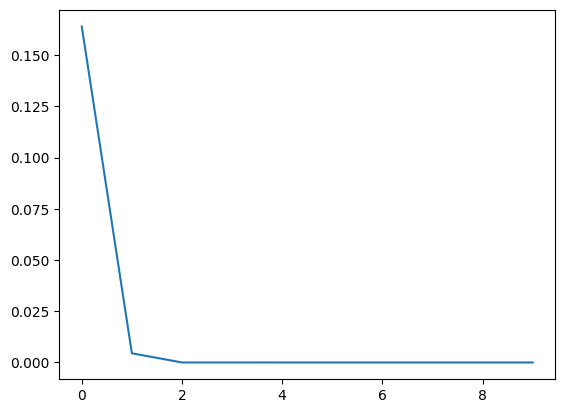

In [6]:
plt.plot(losses)
plt.show()

The code generates a plot showing the decrease in loss over epochs, indicating the convergence of the network.

## Conclusion

This code provides a simple implementation of a neural network training using the backpropagation algorithm. It serves as a starting point for understanding the mechanics of backpropagation and weight updates in a basic neural network architecture.

This file provides a detailed explanation of the code, including the network architecture, input initialization, training parameters, and the training loop. It also explains the significance of the loss curve plot at the end of the training process.